In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,\
recall_score, confusion_matrix, plot_confusion_matrix,\
roc_auc_score, roc_curve
import xgboost as xgb

In [2]:
# Load dataset, and skip the comment lines

data = pd.read_csv('autoscan_features.3.csv', skiprows = range(6))
data

,ID,OBJECT_TYPE,AMP,A_IMAGE,A_REF,BAND,B_IMAGE,B_REF,CCDID,COLMEDS,...,N3SIG3,N3SIG3SHIFT,N3SIG5,N3SIG5SHIFT,NN_DIST_RENORM,NUMNEGRN,SCALE,SNR,SPREADERR_MODEL,SPREAD_MODEL
0,10742010,0,0.808323,1.508,2.650069,i,0.950,1.899501,10,0.112077,...,0,-8,0,-9,0.674934,22,2.024122,7.722346,0.004629,-0.003718
1,8828139,0,0.975141,1.430,NaN,i,1.319,NaN,10,0.072256,...,0,5,0,5,NaN,21,1.379283,25.582918,0.002420,-0.000578
2,8229889,0,0.877440,0.505,NaN,z,0.494,NaN,57,0.106124,...,0,1,0,1,NaN,20,0.950069,3.914192,0.008863,-0.020044
3,11033218,0,0.681179,0.762,3.008957,i,0.449,2.855881,1,0.139071,...,0,-14,2,-27,1.240574,18,1.749488,5.068382,0.008041,0.000246
4,8341858,0,0.645906,1.205,1.352224,i,0.982,1.063333,30,0.123302,...,0,4,0,4,2.970234,16,1.930613,7.372579,0.005606,0.001771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898958,11488874,1,0.321129,1.902,4.409714,i,0.619,4.093379,56,0.047263,...,1,-22,4,-37,1.120426,12,2.002670,6.475171,0.006848,0.007744
898959,10061574,1,0.825902,1.851,3.478065,i,1.209,3.081573,28,0.049473,...,0,-18,2,-40,0.295019,25,1.643643,23.021852,0.002264,-0.007824
898960,7754827,1,0.784481,0.500,2.020185,z,0.498,1.603205,19,0.072954,...,0,-10,1,-14,0.415568,19,1.339798,4.583996,0.006801,-0.015477
898961,7789620,1,0.525480,2.227,9.917985,z,1.249,8.429220,49,0.105302,...,1,-12,4,-25,2.119657,12,2.247390,8.701074,0.003749,-0.001417


In [3]:
# 55814 rows of the data contain NaN values. Since there are nearly
# 900000 rows in this dataset, I'm going to just drop these rows.

data = data.dropna()

In [4]:
# Figure out the column names in the dataset

data.columns

Index(['ID', 'OBJECT_TYPE', 'AMP', 'A_IMAGE', 'A_REF', 'BAND', 'B_IMAGE',
       'B_REF', 'CCDID', 'COLMEDS', 'DIFFSUMRN', 'ELLIPTICITY', 'FLAGS',
       'FLUX_RATIO', 'GAUSS', 'GFLUX', 'L1', 'LACOSMIC', 'MAG', 'MAGDIFF',
       'MAGLIM', 'MAG_FROM_LIMIT', 'MAG_REF', 'MAG_REF_ERR', 'MASKFRAC',
       'MIN_DISTANCE_TO_EDGE_IN_NEW', 'N2SIG3', 'N2SIG3SHIFT', 'N2SIG5',
       'N2SIG5SHIFT', 'N3SIG3', 'N3SIG3SHIFT', 'N3SIG5', 'N3SIG5SHIFT',
       'NN_DIST_RENORM', 'NUMNEGRN', 'SCALE', 'SNR', 'SPREADERR_MODEL',
       'SPREAD_MODEL'],
      dtype='object')

In [25]:
# This is the target variable. A value of 0 indicates the presence 
# of a supernova. As seen here, the dataset is fairly balanced.

data['OBJECT_TYPE'].value_counts()

0    424326
1    418823
Name: OBJECT_TYPE, dtype: int64

In [6]:
# Identify the types of data in the dataframe

data.dtypes

ID                               int64
OBJECT_TYPE                      int64
AMP                            float64
A_IMAGE                        float64
A_REF                          float64
BAND                            object
B_IMAGE                        float64
B_REF                          float64
CCDID                            int64
COLMEDS                        float64
DIFFSUMRN                      float64
ELLIPTICITY                    float64
FLAGS                            int64
FLUX_RATIO                     float64
GAUSS                          float64
GFLUX                          float64
L1                             float64
LACOSMIC                       float64
MAG                            float64
MAGDIFF                        float64
MAGLIM                           int64
MAG_FROM_LIMIT                 float64
MAG_REF                        float64
MAG_REF_ERR                    float64
MASKFRAC                       float64
MIN_DISTANCE_TO_EDGE_IN_N

In [9]:
# Identify the categorical (object-type) features for one-hot
# encoding

data = pd.get_dummies(data, columns = ['BAND'])

In [10]:
# Check that all the datatypes are numerical after one-hot encoding

data.dtypes

ID                               int64
OBJECT_TYPE                      int64
AMP                            float64
A_IMAGE                        float64
A_REF                          float64
B_IMAGE                        float64
B_REF                          float64
CCDID                            int64
COLMEDS                        float64
DIFFSUMRN                      float64
ELLIPTICITY                    float64
FLAGS                            int64
FLUX_RATIO                     float64
GAUSS                          float64
GFLUX                          float64
L1                             float64
LACOSMIC                       float64
MAG                            float64
MAGDIFF                        float64
MAGLIM                           int64
MAG_FROM_LIMIT                 float64
MAG_REF                        float64
MAG_REF_ERR                    float64
MASKFRAC                       float64
MIN_DISTANCE_TO_EDGE_IN_NEW    float64
N2SIG3                   

In [16]:
# Designate the X (features) and y (target) variables

X = data.drop(['ID', 'OBJECT_TYPE'], axis = 1)
y = data['OBJECT_TYPE']

In [17]:
# Split the data into training and testing data, with 80% training
# and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   stratify = y)

In [18]:
# Call an instance of the XGBClassifier with the default parameters
# and fit to the training data

xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

C:\Users\titan\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [21]:
# Make predictions using the test features

y_pred = xgboost.predict(X_test)

In [22]:
# Accuracy score (ratio of total correct predictions)

print('Accuracy')
print(accuracy_score(y_test, y_pred))

Accuracy
0.9679890885370337


In [23]:
# Precision score (ratio of correct positive predictions)

print('Precision')
print(precision_score(y_test, y_pred))

Precision
0.9633098033651402


In [24]:
# Recall score (ratio of positives correctly identified)

print('Recall')
print(recall_score(y_test, y_pred))

Recall
0.972601922043813


[[81762  3103]
 [ 2295 81470]]


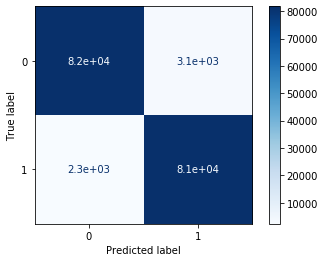

In [33]:
# Confusion matrix showing true and false predictions

print(confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(xgboost, X_test, y_test,
                            cmap = plt.cm.Blues))

In [35]:
# Calculate the ROC-AUC metric

print(roc_auc_score(y_test, y_pred))

0.9680189837639085


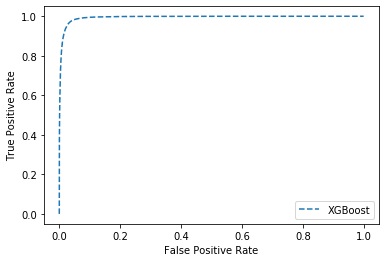

In [42]:
# Plot the ROC curve

y_pred_proba = xgboost.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, linestyle = '--', label = 'XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()